# Data Cleaning Process

## 1. Import Libraries

In [18]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load dataset

In [3]:
df_training = pd.read_csv("../data/processed/Merged_Training_Set.csv") 

In [6]:
df_training.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
df_training = df_training.set_index('id')

In [ ]:
### Categorical Columns
- permit

#### Categorical columns to be removed

##### Columns to remove at first

In [7]:

df_training = df_training.drop(['wpt_name', 'recorded_by', 'scheme_name'], axis=1)
df_training.shape

(59400, 37)

##### Columns to analyze together:
- funder, installer, *scheme_name


In [9]:
df_training = df_training.drop('num_private', axis=1)
df_training.shape

(59400, 36)

**funder**
Lets check if lowering case can help.

In [14]:
df_training['funder'].value_counts()

funder
government of tanzania    9084
nan                       3637
danida                    3114
hesawa                    2202
rwssp                     1374
                          ... 
rarymond ekura               1
justine marwa                1
municipal council            1
afdp                         1
samlo                        1
Name: count, Length: 1897, dtype: int64

In [ ]:
df_training['funder'] = df_training['funder'].astype(str).str.lower()
df_training['funder'].value_counts()

funder
government of tanzania    9084
nan                       3637
danida                    3114
hesawa                    2202
rwssp                     1374
                          ... 
rarymond ekura               1
justine marwa                1
municipal council            1
afdp                         1
samlo                        1
Name: count, Length: 1897, dtype: int64

No difference with lowercase.

#### Numeric Columns

In [10]:
df_training = df_training.drop('public_meeting', axis=1)
df_training.shape

(59400, 35)

### Finding correlation between numeric columns

The values more than ±0.5 show stronger relation between columns

Below is the correlation matrix of the numeric only values, we can later create for categorical columns as well.


In [16]:
correlation_matrix = df_training.select_dtypes(include='number').corr()

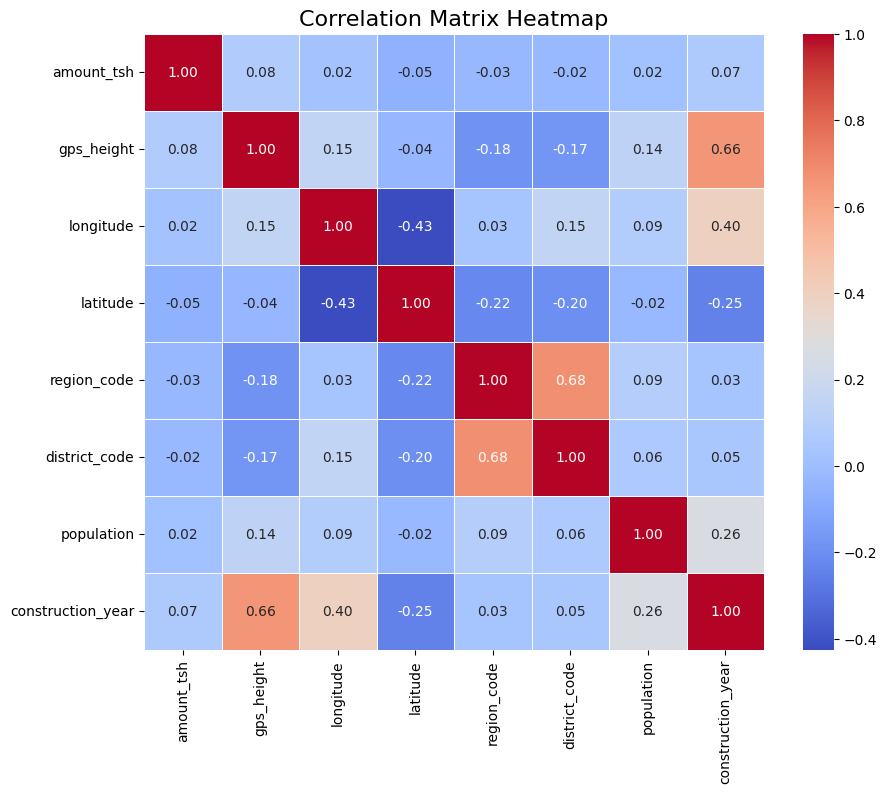

In [19]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16)

# Show the plot
plt.show()